In [78]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
import numpy as np
import bidi.algorithm
import arabic_reshaper

In [2]:
fpath = '/media/sf_VBox_Shared/Arabic/Analyses/topicmodelling/'

In [3]:
document_topics = pd.read_csv(os.path.join(fpath, 'document_topics.csv'), index_col=0).T

In [91]:
df_topics = pd.read_csv(os.path.join(fpath, 'topics.csv'), index_col=0)

In [4]:
metadata = ''

In [5]:
document_topics.index = pd.MultiIndex.from_tuples(document_topics.index.str.split('.').map(lambda l: ('.'.join(l[:-1]), l[-1])))
document_topics = document_topics.sort_index()

In [6]:
document_topics[:20].style.background_gradient(cmap='Greens', high=1, axis=1)

In [85]:
book_names = sorted(document_topics.index.levels[0])
topics = document_topics.columns
for t in topics:
    print(t)

صوم يوم حوج
وصي قرر ورث
قتل قطع ودي
نكح حلف مرأ
اه عدم عبر
عقد رهن قبض
زكي صدق شهب
غسل طهر نجس
سجد أمم ركع
فى رسل حمد


In [56]:
color_list = sns.color_palette(n_colors=len(topics))
color_dict = {t: color_list[i] for i,t in enumerate(topics)}

In [57]:
new_ind = []
for book in book_names:
    new_ind.extend(list(range(len(document_topics.loc[book]))))
new_ind = pd.MultiIndex.from_tuples(zip(document_topics.index.get_level_values(0), new_ind))

In [58]:
largest_topics = document_topics.idxmax(axis=1)
largest_topics.index = new_ind
largest_topics = largest_topics.reset_index()
largest_topics.columns = ['book', 'chapter', 'topic']

book_dict = {b: i for i,b in enumerate(book_names)}

In [98]:
import matplotlib.colors

def style_row(row):
    topic_id = int(row.name.split(' ')[-1])
    color = matplotlib.colors.to_hex(color_list[topic_id])
    attr = 'background-color: {}'.format(color)
    return [attr for v in  row]
df_topics.style.apply(style_row, axis=1)

,Key 0,Key 1,Key 2,Key 3,Key 4,Key 5,Key 6,Key 7,Key 8,Key 9
Topic 0,صوم,يوم,حوج,أكل,جزأ,حلل,كفر,عمر,لحج,نذر
Topic 1,وصي,قرر,ورث,بقي,نصف,ربع,عشر,رثي,نصب,وقف
Topic 2,قتل,قطع,ودي,جني,حدد,رجل,سرق,قصص,جرح,عقل
Topic 3,نكح,حلف,مرأ,يمن,وطأ,عدا,عقد,ثبت,حنث,مهر
Topic 4,اه,عدم,عبر,الخ,وبأ,شرح,كلم,شيخ,صنف,كون
Topic 5,عقد,رهن,قبض,ثمن,أجر,شفع,يود,عمل,بطل,شرك
Topic 6,زكي,صدق,شهب,عشر,عرف,ثمن,سحن,عمل,جزأ,كرى
Topic 7,غسل,طهر,نجس,ألم,وضأ,حوض,يمم,مسح,عود,دمي
Topic 8,سجد,أمم,ركع,قرأ,وقت,عود,كبر,فرض,كره,ربع
Topic 9,فى,رسل,حمد,نبأ,عمر,سعد,خبر,رجل,حيا,علي


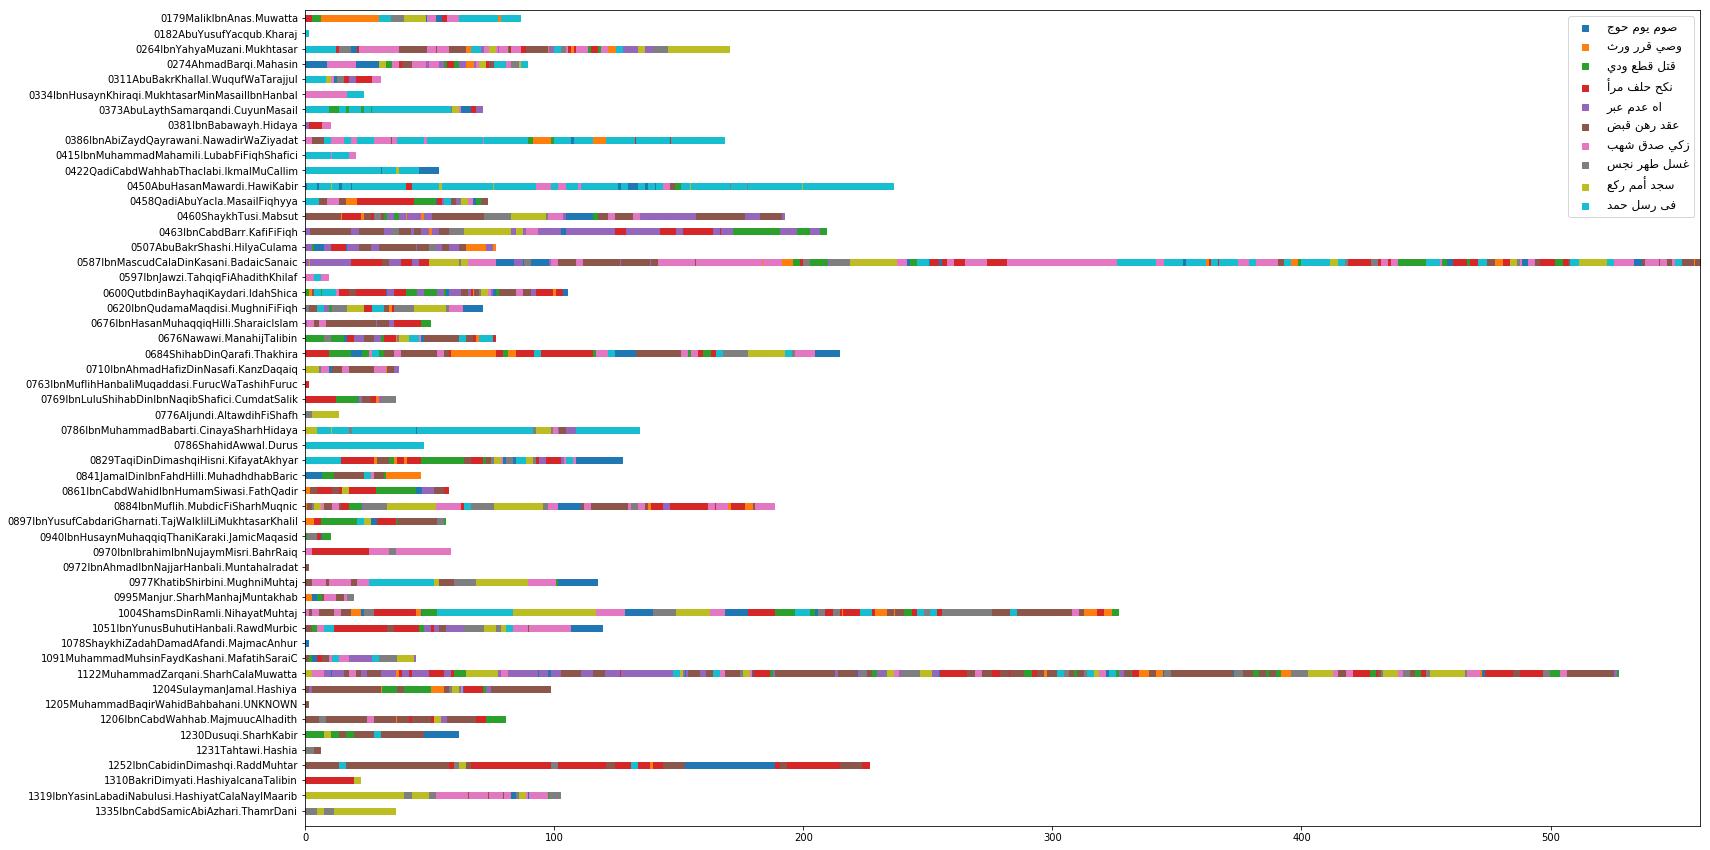

In [87]:
plt.figure(figsize=(25,15))
ax = plt.gca()
for topic in topics:
    largest_topics_sub = largest_topics[largest_topics['topic']==topic]
    color = color_dict[topic] 
    y = [book_dict[s] for s in largest_topics_sub['book']]
    x = largest_topics_sub['chapter']
    ax.scatter(x,y, marker='s', edgecolors=None, c=np.array((color,)), label=bidi.algorithm.get_display(arabic_reshaper.reshape(topic)))
ax.set_yticks(np.arange(len(book_dict)))
ax.set_yticklabels(book_names)
ax.set_xlim(0, largest_topics['chapter'].max())
ax.set_ylim(-0.5, len(book_names))
plt.legend(fontsize='large')
ax.invert_yaxis()
plt.show()